In [1]:
import os
import pandas as pd
from nltk.stem.snowball import FrenchStemmer
stemmer = FrenchStemmer()

In [2]:
def read_file(filename):
  with open(filename, 'r') as file:
    data = file.read().rstrip()
  # split recipes
  recipes = data.split('**')
  # split ingredients
  recipes = [recipe.split('##') for recipe in recipes]
  # remove newlines
  recipes = [[x.strip('\n') for x in recipe] for recipe in recipes]
  return recipes

In [47]:
def process_ingredients(ingredients):
  result = []
  unit_set = {'g', 'kg', 'cl', 'dl', 'cuil.', 'litre', 'pincée', 'filets', 'tranche', 'zeste'}
  ingredients = ingredients.split('\n')
  for l in ingredients:
    tri = l.split(' ')
    unit = '-'
    try:
      quantity = int(tri[0])
      tri.pop(tri.index(tri[0]))
    except ValueError:
      try:
        quantity = float(tri[0])
        tri.pop(tri.index(tri[0]))
      except ValueError:
        quantity = '-'
    if tri[0] in unit_set:
      unit = tri[0]
      tri.pop(tri.index(tri[0]))
      
    # other than quantity and unit, the rest is the ingredient
    ingredient = ' '.join(tri)
    # de lait -> lait
    if ingredient.startswith('de'):
      ingredient = ingredient.split(' ')[1]
    # get stem of ingredient
    ingredient = stemmer.stem(ingredient)

    result.append((quantity, unit, ingredient))
  return result
  

In [48]:
data_dir = '../res/recipes/'
recipes_lst = []
for filename in os.listdir(data_dir):
  recipes_lst += read_file(data_dir+filename)
recipes_df = pd.DataFrame(recipes_lst, columns = ['region', 'recipe_name', 'with ingredients or not',
                  'number of people', 'ingredients', 'recipe_body'])
recipes_df.head()

,region,recipe_name,with ingredients or not,number of people,ingredients,recipe_body
0,Alsace,LE KUGELHOPF,with,6,0.5 litre de lait\n500 g farine\n250 g beurre\...,Pour 6 personnes : Mettez dans une terrine 1/2...
1,Alsace,LE SCHWOWCBREDEL,with,6,500 g farine\n500 g sucre\n500 g amandes\n500 ...,Pour 6 personnes: Mélanger farine et beurre. R...
2,Alsace,PARFAIT DE FOIE GRAS STRASBOURGEOISE,with,-,1 kg foie gras\n1 truffe\n1 dl gelée\n100 g be...,"1 kg de foie gras d’Alsace 1er qualité, dénerv..."
3,Alsace,TRUITES DE LA FECHT COLMARIENNE,with,4,4 truites\n8 écrevisses\n4 œufs\n50 g oignons\...,Pour 4 personnes: Prenez 4 belles truites du t...
4,Alsace,LES SCHANKELAS,with,-,375 g sucre\n250 g amandes\n200 g beurre\n250 ...,Ecraser le beurre avec la farine et bien mêler...


In [49]:
recipes_df['processed'] = recipes_df['ingredients'].apply(lambda x: process_ingredients(x))
recipes_df

,region,recipe_name,with ingredients or not,number of people,ingredients,recipe_body,processed
0,Alsace,LE KUGELHOPF,with,6,0.5 litre de lait\n500 g farine\n250 g beurre\...,Pour 6 personnes : Mettez dans une terrine 1/2...,"[(0.5, litre, lait), (500, g, farin), (250, g,..."
1,Alsace,LE SCHWOWCBREDEL,with,6,500 g farine\n500 g sucre\n500 g amandes\n500 ...,Pour 6 personnes: Mélanger farine et beurre. R...,"[(500, g, farin), (500, g, sucr), (500, g, ama..."
2,Alsace,PARFAIT DE FOIE GRAS STRASBOURGEOISE,with,-,1 kg foie gras\n1 truffe\n1 dl gelée\n100 g be...,"1 kg de foie gras d’Alsace 1er qualité, dénerv...","[(1, kg, foie gr), (1, -, truff), (1, dl, gel)..."
3,Alsace,TRUITES DE LA FECHT COLMARIENNE,with,4,4 truites\n8 écrevisses\n4 œufs\n50 g oignons\...,Pour 4 personnes: Prenez 4 belles truites du t...,"[(4, -, truit), (8, -, écrev), (4, -, œuf), (5..."
4,Alsace,LES SCHANKELAS,with,-,375 g sucre\n250 g amandes\n200 g beurre\n250 ...,Ecraser le beurre avec la farine et bien mêler...,"[(375, g, sucr), (250, g, amand), (200, g, beu..."
...,...,...,...,...,...,...,...
335,Lyon,"FEUILLETE AUX ORONGES ET AUX ECREVISSES, MARTELIN",without,6,écrevisse\nvin blanc\nlégumes\nvelouté de vola...,Pour 6 personnes : Faire sauter et cardinalise...,"[(-, -, écrev), (-, -, vin blanc), (-, -, légu..."
336,Lyon,GRAS-DOUBLE SAUTE LYONNAISE,with,6,1 kg gras-double\n2 gros oignons\n6 cl huile\n...,Pour 6 personnes : Emincer le gras-double en g...,"[(1, kg, gras-doubl), (2, -, gros oignon), (6,..."
337,Lyon,LA GALETTE LYONNAISE,with,4-5,10 pommes de terre\n150 g beurre\n3 oignons\ns...,Pour 4 ou 5 personnes : Préparer une purée de ...,"[(10, -, pommes de terr), (150, g, beurr), (3,..."
338,Lyon,LE SALADIER LYONNAIS,with,4,1 pied mouton\n1 foie volaille\n3 œufs\n2 hare...,Pour 4 personnes : Faire une vinaigrette bien ...,"[(1, -, pied mouton), (1, -, foie volaill), (3..."


In [50]:
for index, row in recipes_df.iterrows():
    for ingredient in row['processed']:
      print(ingredient)

(0.5, 'litre', 'lait')
(500, 'g', 'farin')
(250, 'g', 'beurr')
(2, '-', 'œuf')
(125, 'g', 'raisins malag')
(6, 'cl', 'kirsch')
(125, 'g', 'sucr')
(25, 'g', 'levure de boulang')
(1, 'pincée', 'sel')
('-', '-', 'quelques amand')
(500, 'g', 'farin')
(500, 'g', 'sucr')
(500, 'g', 'amand')
(500, 'g', 'beurr')
(125, 'g', 'écorce orange confit')
(30, 'g', 'cannelle en poudr')
(3, 'cl', "eau fleur d'orang")
(2, '-', 'œuf')
(1, 'kg', 'foie gr')
(1, '-', 'truff')
(1, 'dl', 'gel')
(100, 'g', 'beurr')
(4, '-', 'truit')
(8, '-', 'écrev')
(4, '-', 'œuf')
(50, 'g', 'oignon')
(0.5, 'litre', 'vin blanc')
(50, 'g', 'carott')
('-', '-', 'lauri')
('-', '-', 'thym')
('-', '-', 'persil')
('-', '-', 'poivr')
('-', '-', 'légum')
(375, 'g', 'sucr')
(250, 'g', 'amand')
(200, 'g', 'beurr')
(250, 'g', 'farin')
(5, '-', 'œuf')
(1, '-', 'citron')
('-', '-', 'vanill')
('-', '-', "fleur d'orang")
(250, 'g', 'farin')
(80, 'g', 'beurr')
('-', '-', 'chapelur')
(500, 'g', 'farin')
(3, '-', 'œuf')
(14, 'litre', 'lait')
(1

In [40]:
for index, row in recipes_df.iterrows():
    for ingredient in row['processed']:
        print(ingredient)
        # if ingredient[2].startswith('de'):
        #     print(ingredient)
        #     tmp = ingredient[2].split(' ')[-1]
        #     print(tmp)

(0.5, 'litre', 'lait')
(500, 'g', 'farine')
(250, 'g', 'beurre')
(2, '-', 'œufs')
(125, 'g', 'raisins Malaga')
(6, 'cl', 'kirsch')
(125, 'g', 'sucre')
(25, 'g', 'levure de boulanger')
(1, 'pincée', 'sel')
('-', '-', 'quelques amandes')
(500, 'g', 'farine')
(500, 'g', 'sucre')
(500, 'g', 'amandes')
(500, 'g', 'beurre')
(125, 'g', 'écorce orange confite')
(30, 'g', 'cannelle en poudre')
(3, 'cl', "eau fleur d'oranger")
(2, '-', 'œufs')
(1, 'kg', 'foie gras')
(1, '-', 'truffe')
(1, 'dl', 'gelée')
(100, 'g', 'beurre')
(4, '-', 'truites')
(8, '-', 'écrevisses')
(4, '-', 'œufs')
(50, 'g', 'oignons')
(0.5, 'litre', 'vin blanc')
(50, 'g', 'carottes')
('-', '-', 'laurier')
('-', '-', 'thym')
('-', '-', 'persil')
('-', '-', 'poivre')
('-', '-', 'légumes')
(375, 'g', 'sucre')
(250, 'g', 'amandes')
(200, 'g', 'beurre')
(250, 'g', 'farine')
(5, '-', 'œufs')
(1, '-', 'citron')
('-', '-', 'vanille')
('-', '-', "fleur d'oranger")
(250, 'g', 'farine')
(80, 'g', 'beurre')
('-', '-', 'chapelure')
(500, '

In [ ]:
# cooccurance of ingredients in a receipe region

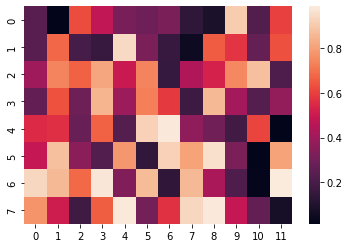

In [23]:
import seaborn as sns
import numpy as np
sample_data = np.random.rand(8, 12)  
ax = sns.heatmap(sample_data)  

In [25]:
sample_data.shape

(8, 12)

In [26]:
Alsace = recipes_df.groupby('region').get_group('Alsace')
Alsace

,region,recipe_name,with ingredients or not,number of people,ingredients,recipe_body,processed
0,Alsace,LE KUGELHOPF,with,6,0.5 litre de lait\n500 g farine\n250 g beurre\...,Pour 6 personnes : Mettez dans une terrine 1/2...,"[(0.5, litre, de lait), (500, g, farine), (250..."
1,Alsace,LE SCHWOWCBREDEL,with,6,500 g farine\n500 g sucre\n500 g amandes\n500 ...,Pour 6 personnes: Mélanger farine et beurre. R...,"[(500, g, farine), (500, g, sucre), (500, g, a..."
2,Alsace,PARFAIT DE FOIE GRAS STRASBOURGEOISE,with,-,1 kg foie gras\n1 truffe\n1 dl gelée\n100 g be...,"1 kg de foie gras d’Alsace 1er qualité, dénerv...","[(1, kg, foie gras), (1, -, truffe), (1, dl, g..."
3,Alsace,TRUITES DE LA FECHT COLMARIENNE,with,4,4 truites\n8 écrevisses\n4 œufs\n50 g oignons\...,Pour 4 personnes: Prenez 4 belles truites du t...,"[(4, -, truites), (8, -, écrevisses), (4, -, œ..."
4,Alsace,LES SCHANKELAS,with,-,375 g sucre\n250 g amandes\n200 g beurre\n250 ...,Ecraser le beurre avec la farine et bien mêler...,"[(375, g, sucre), (250, g, amandes), (200, g, ..."
5,Alsace,NOUILLES A L’ALSACIENNE,with,4,250 g farine\n80 g beurre\nchapelure,Pour 4 personnes : Prendre une demi-livre de n...,"[(250, g, farine), (80, g, beurre), (-, -, cha..."
6,Alsace,KNEPFI,with,4,500 g farine\n3 œufs\n14 litre lait\n100 g beu...,Pour 4 personnes : Préparer une pâte avec une ...,"[(500, g, farine), (3, -, œufs), (14, litre, l..."
7,Alsace,LA BONNE RECETTE DE LA VRAIE CHOUCROUTE,with,3,500 g choucroute\n1 oignon\n2 cuil. graisse d'...,Pour 3 personnes: Dans une marmite bien étamée...,"[(500, g, choucroute), (1, -, oignon), (2, cui..."
8,Alsace,LA TARTE ALSACIENNE,with,6,200 g farine\n80 g beurre\n100 g sucre\n125 g ...,Pour 6 personnes : Garnir une tourtière de pât...,"[(200, g, farine), (80, g, beurre), (100, g, s..."


In [30]:
Alsace_ingredients

[['de lait',
  'farine',
  'beurre',
  'œufs',
  'raisins Malaga',
  'kirsch',
  'sucre',
  'levure de boulanger',
  'de sel',
  'quelques amandes'],
 ['farine',
  'sucre',
  'amandes',
  'beurre',
  'écorce orange confite',
  'cannelle en poudre',
  "eau fleur d'oranger",
  'œufs'],
 ['foie gras', 'truffe', 'gelée', 'beurre'],
 ['truites',
  'écrevisses',
  'œufs',
  'oignons',
  'vin blanc',
  'carottes',
  'laurier',
  'thym',
  'persil',
  'poivre',
  'légumes'],
 ['sucre',
  'amandes',
  'beurre',
  'farine',
  'œufs',
  'citron',
  'vanille',
  "fleur d'oranger"],
 ['farine', 'beurre', 'chapelure'],
 ['farine', 'œufs', 'lait', 'beurre', 'fromage râpé', 'sauce tomate'],
 ['choucroute',
  'oignon',
  "graisse d'oie",
  'vin blanc',
  'pomme',
  'grains genièvre',
  'bouillon',
  'lard de poitrine',
  'kirsch',
  'pommes de terre',
  'côtes de porc',
  'saucisses'],
 ['farine', 'beurre', 'sucre', 'crème fraîche', 'pommes']]

In [29]:
Alsace_ingredients = []
for index, row in Alsace.iterrows():
    recipe_inredients = []
    for tup in row['processed']:
        recipe_inredients.append(tup[2])
    Alsace_ingredients.append(recipe_inredients)
sns.heatmap(Alsace_ingredients)

/Users/su/anaconda3/envs/adaexam/lib/python3.9/site-packages/seaborn/matrix.py:109: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_data = np.asarray(data)


IndexError: Inconsistent shape between the condition and the input (got (9, 1) and (9,))